In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


In [2]:
sp_500_comp=pd.read_csv("/kaggle/input/sp-500-stocks/sp500_companies.csv")
sp_500_index=pd.read_csv("/kaggle/input/sp-500-stocks/sp500_index.csv")
sp_500_stocks=pd.read_csv("/kaggle/input/sp-500-stocks/sp500_stocks.csv")

In [3]:
files={"S&P Companies Data":sp_500_comp, "S&P Index Data": sp_500_index,"S&P Stocks Data":sp_500_stocks}

In [4]:
def information(df):
    
    print(f"\n----------Information about {df}--------------------\n")
    # Dataframes column information
    print(f"Column Data \n {files[df].info()}")
    
    # Dataframes Sample
    print("\n")
    print(f"-----Sample data-----\n{files[df].head(2)}")
    
    # DataFrame Null values
    df_null=round(files[df].isna().sum()/files[df].isna().count()*100,2).sort_values(ascending=False)
    print("\n")
    print(f"Null values are \n{df_null}")
    
    #Drop Null values
    files[df].dropna(inplace=True)    
    

In [5]:
#understand the data
for key in files:
    information(key)


----------Information about S&P Companies Data--------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             494 non-null    object 
 1   Symbol               494 non-null    object 
 2   Shortname            494 non-null    object 
 3   Longname             494 non-null    object 
 4   Sector               494 non-null    object 
 5   Industry             494 non-null    object 
 6   Currentprice         494 non-null    float64
 7   Marketcap            494 non-null    int64  
 8   Ebitda               451 non-null    float64
 9   Revenuegrowth        481 non-null    float64
 10  City                 494 non-null    object 
 11  State                474 non-null    object 
 12  Country              494 non-null    object 
 13  Fulltimeemployees    490 non-null    float64
 14  Longbusinesssummary  

In [6]:
# change date columns from object datatype to date 

def change_format(file):
    
    file['Date']=pd.to_datetime(file['Date'], format='%Y-%m-%d')
    
change_format(sp_500_index)
change_format(sp_500_stocks)


### Analysing Companies dataset

In [7]:
# Changing Marketcap and EBITDA to billion values % Weight to percentage
sp_500_comp['Marketcap']=round(sp_500_comp['Marketcap']/1000000000,2)
sp_500_comp['Ebitda']=round(sp_500_comp['Ebitda']/1000000000,2)
sp_500_comp['Weight']=round(sp_500_comp['Weight']*100,2)

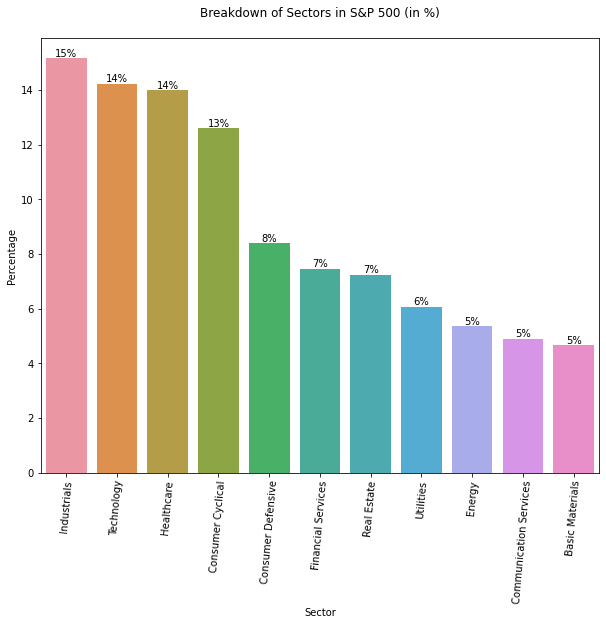

In [8]:
# Breakdown of Sectors in S&P 500
plt.subplots(figsize=(10,8))
sp_sec_brk=sp_500_comp.groupby(by='Sector')['Symbol'].apply(lambda x:round(x.count()/len(sp_500_comp)*100,2)).reset_index().sort_values(by='Symbol',ascending=False)
ax=sns.barplot(data=sp_sec_brk, x='Sector', y='Symbol')
ax.bar_label(ax.containers[0],fmt='%.0f%%')
plt.xticks(rotation=85)
plt.title("Breakdown of Sectors in S&P 500 (in %)\n")
ax.set_ylabel("Percentage")
plt.show()

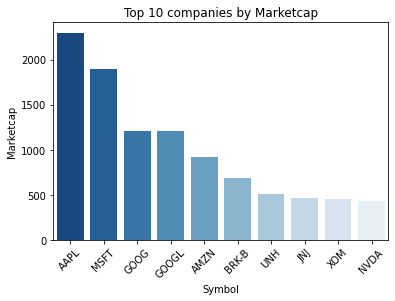

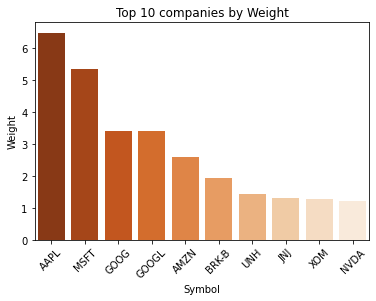

In [9]:
estimators=['Marketcap','Weight']
color={'Marketcap':'Blues_r','Weight':'Oranges_r'}
for est in estimators:
    sns.barplot(data=sp_500_comp.sort_values(by=est, ascending=False).head(10),y=est,x="Symbol", palette=color[est])
    plt.xticks(rotation=45)
    plt.title("Top 10 companies by {}".format(est))
    plt.show()
    

In [10]:
# Stats on Top Companies by MarketCap
top_comp_mkt_cap=sp_500_comp[['Symbol','Currentprice','Marketcap','Ebitda','Revenuegrowth','Fulltimeemployees','Weight']].sort_values(by='Marketcap', ascending=False).head(10)
top_comp_mkt_cap

,Symbol,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
0,AAPL,144.49,2298.56,130.54,0.081,164000.0,6.48
1,MSFT,252.51,1895.84,97.98,0.124,221000.0,5.35
2,GOOG,93.56,1209.29,93.73,0.061,186779.0,3.41
3,GOOGL,93.31,1209.18,93.73,0.061,186779.0,3.41
4,AMZN,90.55,923.76,51.55,0.147,1544000.0,2.61
5,BRK-B,311.45,686.39,9.95,0.090,372000.0,1.94
6,UNH,545.86,514.12,29.35,0.118,350000.0,1.45
7,JNJ,177.84,468.18,31.65,0.019,141700.0,1.32
8,XOM,106.09,452.02,69.71,0.689,63000.0,1.28
9,NVDA,175.35,436.97,10.68,0.030,22473.0,1.23


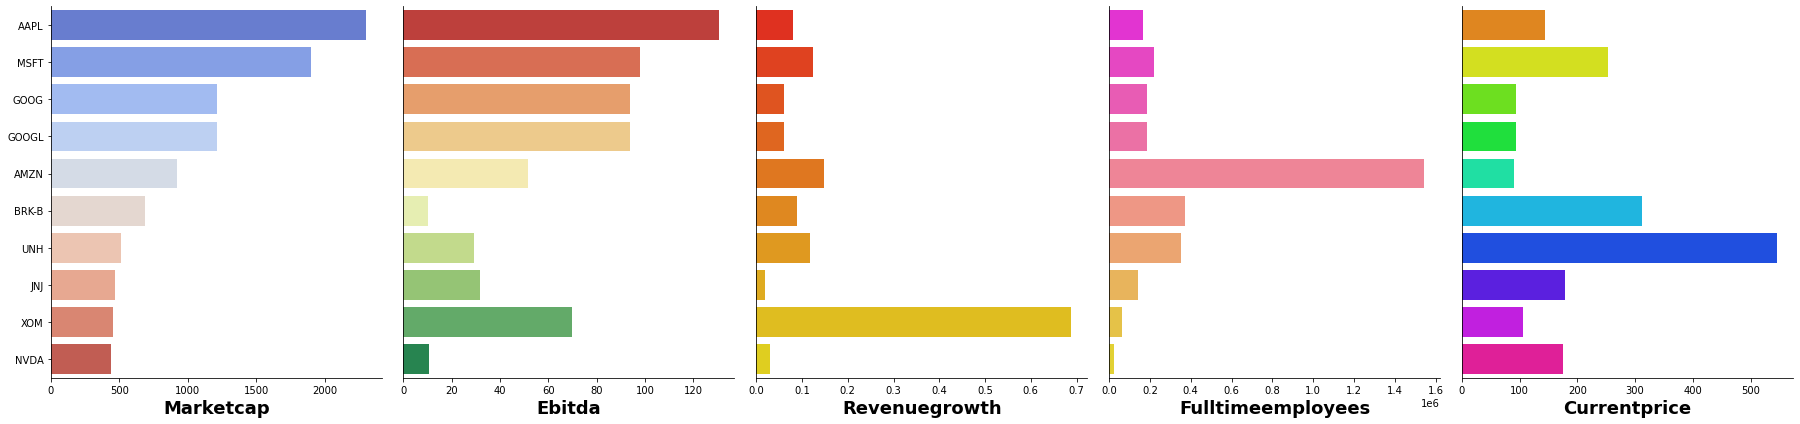

In [11]:
# Map the statistics
fig = plt.figure(figsize=(30, 6), num=None)
x_stats=["Marketcap","Ebitda","Revenuegrowth","Fulltimeemployees","Currentprice"]
palette={"Marketcap":"coolwarm","Ebitda":"RdYlGn","Revenuegrowth":"autumn","Fulltimeemployees":"spring","Currentprice":"hsv"}
for i in range(len(x_stats)):
    ax=plt.subplot(1, 6, i+1)
    ax=sns.barplot(x=x_stats[i], y="Symbol", data=top_comp_mkt_cap, palette=palette[x_stats[i]])
    ax.set_xlabel(x_stats[i], weight='bold',fontsize=18)
    ax.set_ylabel('')
    if i != 0:
        ax.set_yticks([])
sns.despine()
plt.tight_layout()

In [12]:
#count of stocks from each country
sp_500_comp["Country"].unique()

array(['United States'], dtype=object)

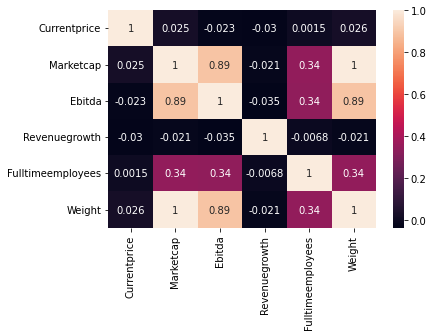

In [13]:
#heatmap
sns.heatmap(sp_500_comp[['Currentprice','Marketcap','Ebitda','Revenuegrowth','Fulltimeemployees','Weight']].corr(), annot=True)
plt.show()

In [14]:
def sp_top_comp(sec,ind, fig, ax,i):
    j=0
    for indus in ind['Industry']:
        top_5_comp=sp_500_comp[sp_500_comp['Industry']==indus].groupby('Symbol').agg({'Currentprice':'mean'}).reset_index().sort_values(by='Currentprice', ascending=False).head(5)
        ax[i,j].bar(top_5_comp['Symbol'],top_5_comp['Currentprice'])
        ax[i,j].set_title(indus, fontsize=22, weight='bold')
        ax[i,j].tick_params(size=30)
        j=j+1
    

In [15]:
# top 3 industry in each sector
def sp_top_ind(sec, fig,ax,i):
    top_3_indu=sp_500_comp[sp_500_comp['Sector']==sec].groupby('Industry').agg({'Currentprice':'mean'}).reset_index().sort_values(by='Currentprice', ascending=False).head(3)
    sp_top_comp(sec,top_3_indu, fig, ax,i)

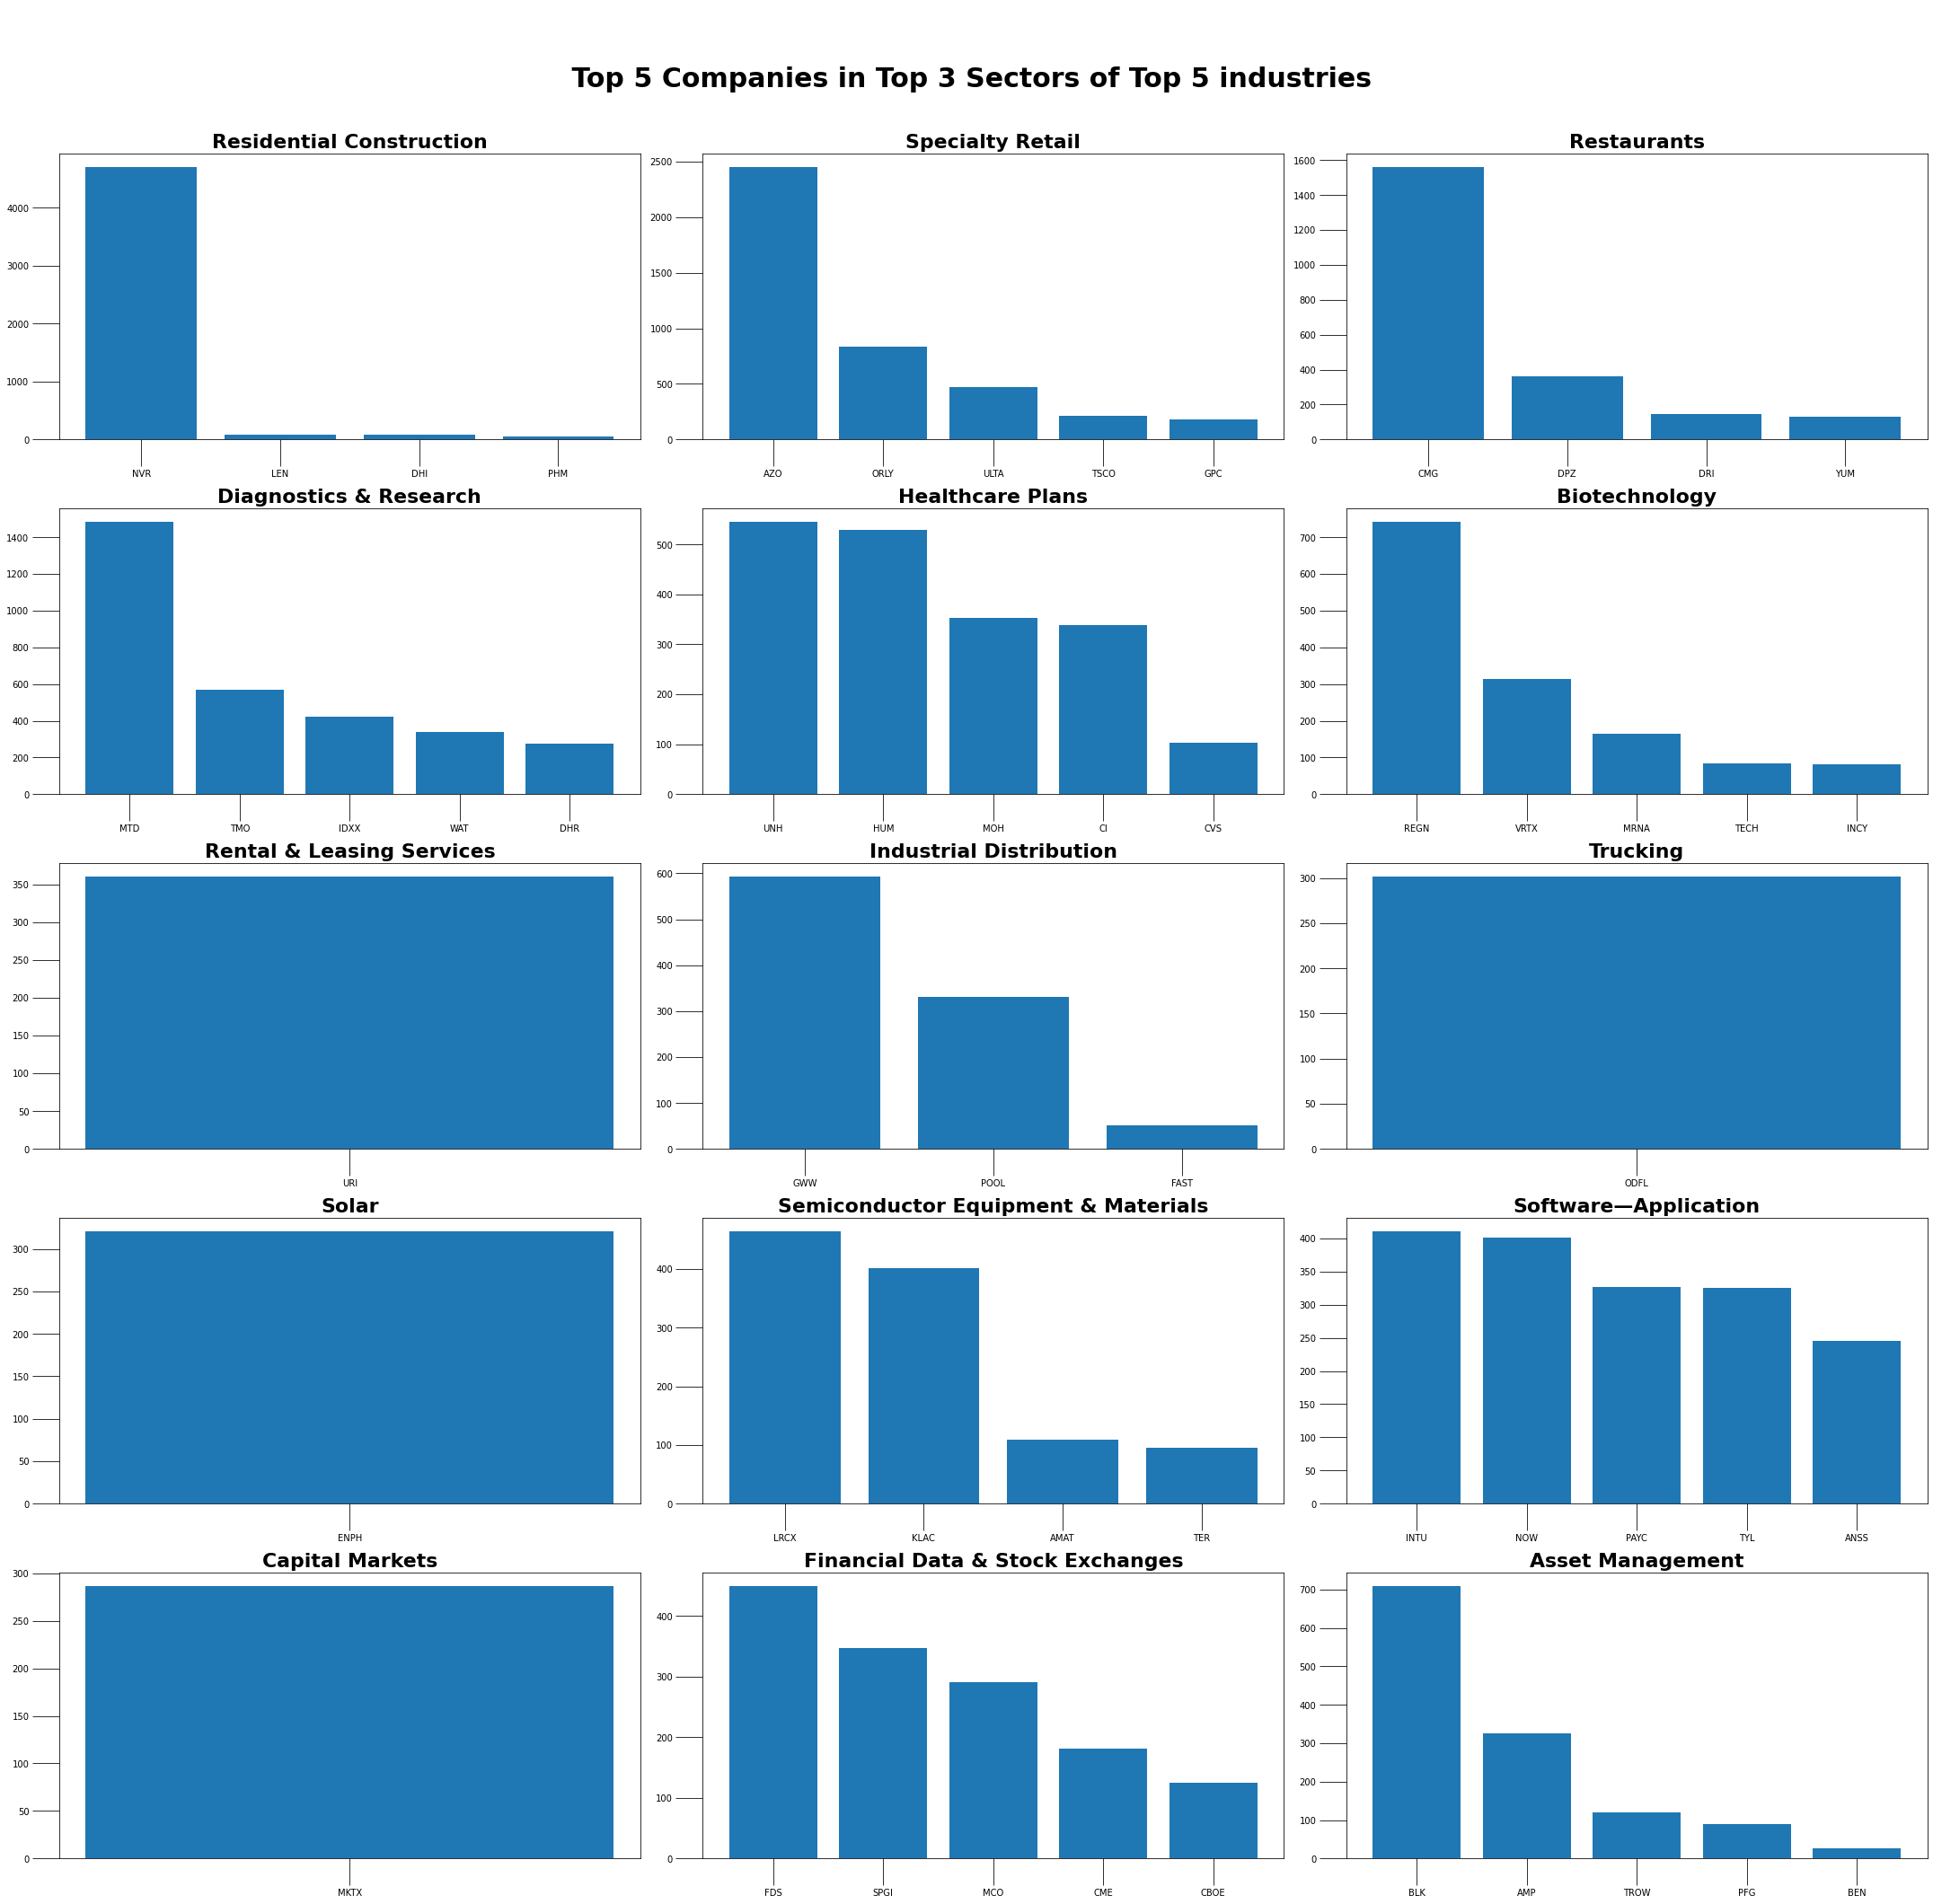

In [16]:
# top 5 Sector
sp_top_sector=sp_500_comp.groupby('Sector').agg({'Currentprice':'mean'}).reset_index().sort_values(by='Currentprice',ascending=False).head(5)
fig, ax= plt.subplots(5,3,figsize=(30,30))
fig.suptitle('\n\n Top 5 Companies in Top 3 Sectors of Top 5 industries\n\n', fontsize=30, weight='bold')
i=0
for sec in sp_top_sector['Sector']:
    sp_top_ind(sec, fig,ax,i)
    i=i+1
fig.tight_layout()

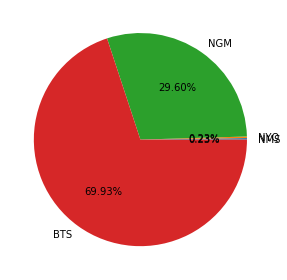

In [17]:
# Number of companies for each exchange
"""
sns.countplot(data=sp_500_comp, x="Exchange", order=sp_500_comp['Exchange'].value_counts().index)
plt.show()"""

plt.pie(sp_500_comp.groupby(['Exchange'])['Symbol'].count(), labels=sp_500_comp['Exchange'].unique(), autopct='%.2f%%')
plt.tight_layout()
plt.show()

### S&P 500 Index Performance

In [18]:
import datetime
from datetime import date
# S&P 500 Index Performance
 
    # What's the current year performance
today=datetime.date.today()
year=today.year
month=today.month

sp_500_index['year']=sp_500_index['Date'].dt.year
sp_500_index['month']=sp_500_index['Date'].dt.month

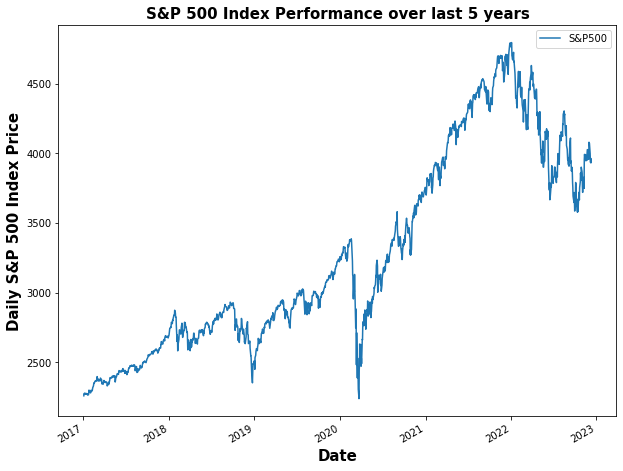

In [19]:
# last 5 years S&P Index performance 
ax=sp_500_index[sp_500_index['year']>=year-5][['S&P500','Date']].set_index('Date').plot(figsize=(10,8))
plt.title("S&P 500 Index Performance over last 5 years", weight='bold', fontsize=15)
ax.set_xlabel("Date", weight='bold', fontsize=15)
ax.set_ylabel("Daily S&P 500 Index Price", weight='bold', fontsize=15)
plt.show()

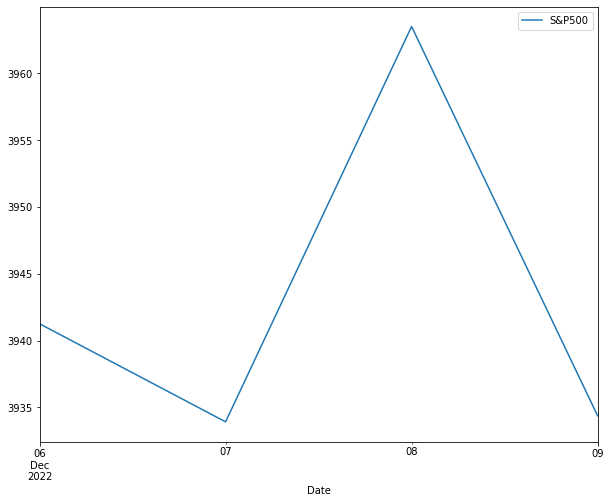

In [20]:
# Last 7 days S&P 500 index tracking

sp_500_index[pd.to_datetime(sp_500_index['Date']).dt.date>=today-datetime.timedelta(days=7)][['Date','S&P500']].set_index('Date').plot(figsize=(10,8))
plt.show()

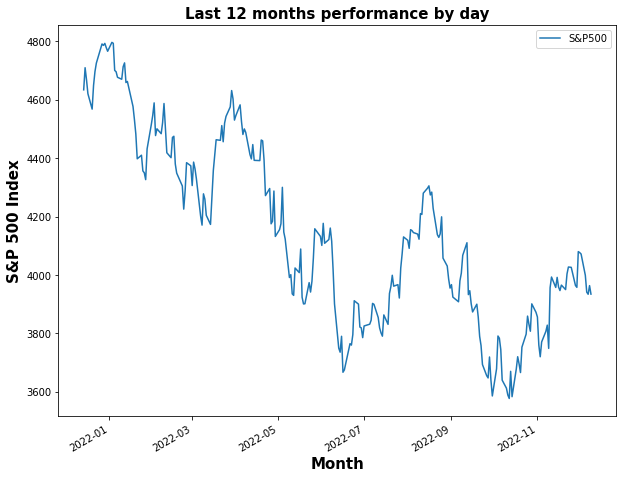

In [21]:
# Last 12 months performance by month
from dateutil.relativedelta import relativedelta
past_date=today - relativedelta(months=12)
ax=sp_500_index[pd.to_datetime(sp_500_index['Date']).dt.date>past_date][["Date",'S&P500']].set_index("Date").plot(figsize=(10,8))
plt.title("Last 12 months performance by day", weight='bold', fontsize=15)
ax.set_xlabel("Month", weight='bold', fontsize=15)
ax.set_ylabel("S&P 500 Index",weight='bold', fontsize=15)
plt.show()

In [22]:
# Current Market Cap of S&P 500 Index

print(f"Total Market Cap of S&P 500 Index is ${round(sp_500_comp['Marketcap'].sum()/1000,3)} trillion dollars")

Total Market Cap of S&P 500 Index is $31.132 trillion dollars


In [23]:
# Biggest and lowest movers as of last day
last_day_stock_data=sp_500_stocks[sp_500_stocks["Date"]==sp_500_stocks["Date"].max()]
last_day_stock_data['per_change']=round((last_day_stock_data['Close']-last_day_stock_data['Open'])/last_day_stock_data['Open']*100,2)
last_day_stock_data['big_movers']=round((last_day_stock_data['High']-last_day_stock_data['Low'])/last_day_stock_data['Low']*100,2)

print(last_day_stock_data.sort_values(by="per_change", ascending=False).head(5))
print(last_day_stock_data.sort_values(by='big_movers', ascending=False).head(5))

              Date Symbol   Adj Close       Close        High         Low  \
101028  2022-12-12    AAL   14.200000   14.200000   14.210000   13.450000   
619209  2022-12-12   EXPD  113.279999  113.279999  113.790001  107.614998   
495367  2022-12-12   DISH   15.400000   15.400000   15.450000   14.660000   
329158  2022-12-12   CDAY   67.440002   67.440002   69.889999   64.010002   
1521952 2022-12-12    VLO  120.660004  120.660004  120.790001  114.474998   

               Open      Volume  per_change  big_movers  
101028    13.490000  23271327.0        5.26        5.65  
619209   107.870003   2154445.0        5.02        5.74  
495367    14.690000   4499195.0        4.83        5.39  
329158    64.410004  11377324.0        4.70        9.19  
1521952  115.360001   5683236.0        4.59        5.52  
              Date Symbol   Adj Close       Close        High         Low  \
329158  2022-12-12   CDAY   67.440002   67.440002   69.889999   64.010002   
1042879 2022-12-12   MRNA  165.1300

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Top 100 most traded stocks in last 5 years & Sectors they belonged to

Text(0, 0.5, '% of Companies')

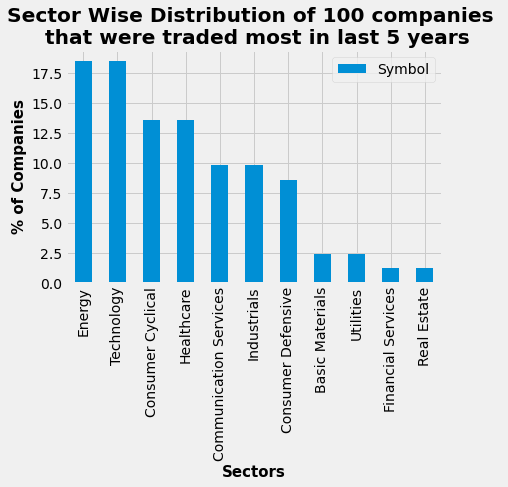

In [24]:
sp_top_stcks=sp_500_stocks[pd.to_datetime(sp_500_stocks['Date']).dt.year>=year-5].groupby('Symbol').agg({'Volume':'mean'}).round()
sp_top_stcks=sp_top_stcks.sort_values(['Volume'], ascending=False).head(100).apply(lambda x:x/1000000).round(2).rename(columns={'Volume':'Volume (in $M)'})
sp_top_trded=pd.merge(sp_top_stcks,sp_500_comp, how='left', on=['Symbol'])
plt.style.use('fivethirtyeight')
sp_top_trded[['Symbol','Sector']].groupby(by='Sector').count().apply(lambda x:round(x/sum(x)*100,2)).sort_values(by='Symbol', ascending=False).plot.bar()
plt.title("Sector Wise Distribution of 100 companies \n that were traded most in last 5 years", weight='bold')
plt.xlabel('Sectors', weight='bold', fontsize=15)
plt.ylabel('% of Companies', weight='bold', fontsize=15)


### Above Sector Traded volume & their return analysis over time

In [25]:
sp_500_stocks[pd.to_datetime(sp_500_stocks['Date']).dt.year>=year-5].head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1762,2017-01-03,MMM,151.730133,178.050003,180.000000,177.220001,178.830002,2509300.0
1763,2017-01-04,MMM,151.960205,178.320007,178.899994,177.610001,178.029999,1542000.0
1764,2017-01-05,MMM,151.440369,177.710007,179.139999,176.889999,178.259995,1447800.0
1765,2017-01-06,MMM,151.883499,178.229996,178.600006,175.800003,177.289993,1625000.0
1766,2017-01-09,MMM,151.065399,177.270004,178.380005,177.199997,178.369995,1622600.0


In [26]:
sp_500_stocks['year']=sp_500_stocks['Date'].dt.year
sp_stock_data=pd.merge(sp_500_stocks, sp_500_comp[['Symbol','Sector','Industry']], how='left', on=['Symbol'])
sp_stock_data[sp_stock_data['Sector']=='Energy'].to_csv("/kaggle/working/Energy_raw_data.csv")


sp_500_stocks_agg=sp_500_stocks.groupby(['Symbol','year'])['Volume'].sum().apply(lambda x: x/1000000).round(2).reset_index()
sp_stock_data=pd.merge(sp_500_stocks_agg, sp_500_comp[['Symbol','Sector']], how='left', on=['Symbol'])
top_stck_hstry=sp_stock_data.groupby(['Sector','year'])['Volume'].sum().reset_index().round(2)
top_stck_hstry[top_stck_hstry['Sector']=='Energy'].to_csv("/kaggle/working/Energy_Stock_Data.csv")
sp_stock_data.head()


,Symbol,year,Volume,Sector
0,A,2010,1241.72,Healthcare
1,A,2011,1527.25,Healthcare
2,A,2012,1149.04,Healthcare
3,A,2013,1073.41,Healthcare
4,A,2014,758.89,Healthcare


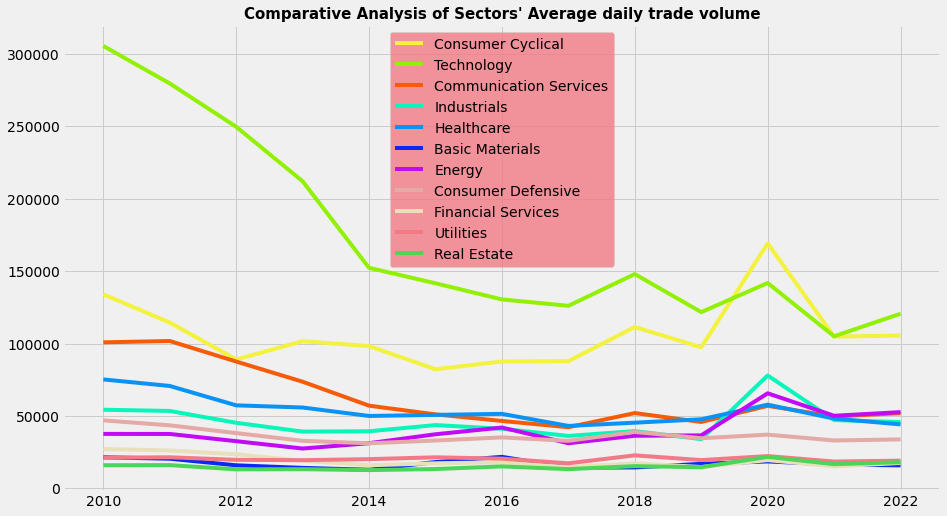

In [27]:
fig, ax=plt.subplots(figsize=(14,8))
color={'Consumer Cyclical':'#f2f23f','Technology':'#92f005','Communication Services':'#f55c0a','Industrials':'#0af5ba','Healthcare':'#0a93f5','Basic Materials':'#0a29f5','Energy':'#c20af5','Consumer Defensive':'#e3aaa6','Financial Services':'#e8e0ba','Utilities':'#f27985','Real Estate':'#4bd659', 'nan':'#4bd659'}
for sec in sp_top_trded[~sp_top_trded['Sector'].isnull()]['Sector'].unique():
    top_stck_hstry_temp=top_stck_hstry[top_stck_hstry['Sector']==sec]
    ax.plot(top_stck_hstry_temp['year'], top_stck_hstry_temp['Volume'], label=sec, color=color[sec])

ax.set_title("Comparative Analysis of Sectors' Average daily trade volume", weight='bold', fontsize=15)
ax.legend(facecolor='#f27985', fontsize="medium")
plt.show()

In [28]:
top_stck_hstry_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 104 to 116
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sector  13 non-null     object 
 1   year    13 non-null     int64  
 2   Volume  13 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ bytes


In [29]:
top_stck_hstry.pivot(index='Sector',columns="year", values="Volume")
top_stck_hstry['Sector'].unique()

array(['Basic Materials', 'Communication Services', 'Consumer Cyclical',
       'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare',
       'Industrials', 'Real Estate', 'Technology', 'Utilities'],
      dtype=object)

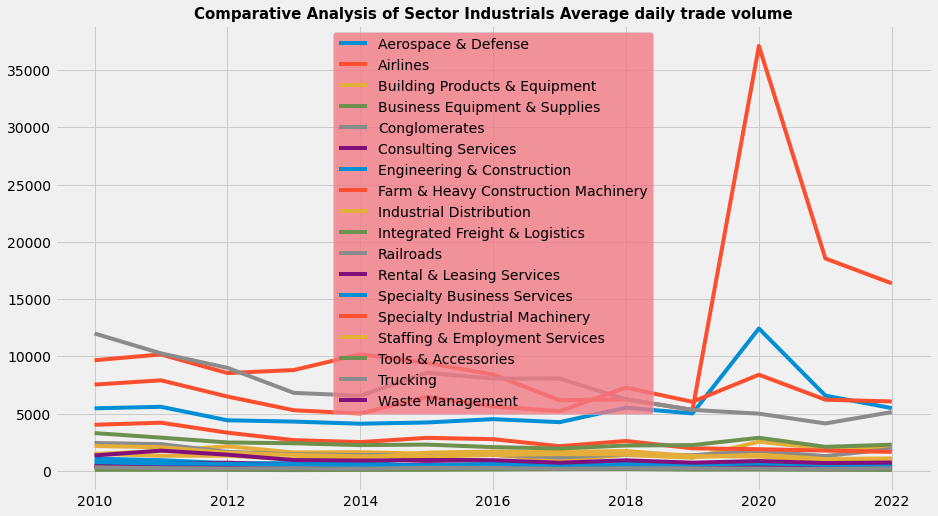

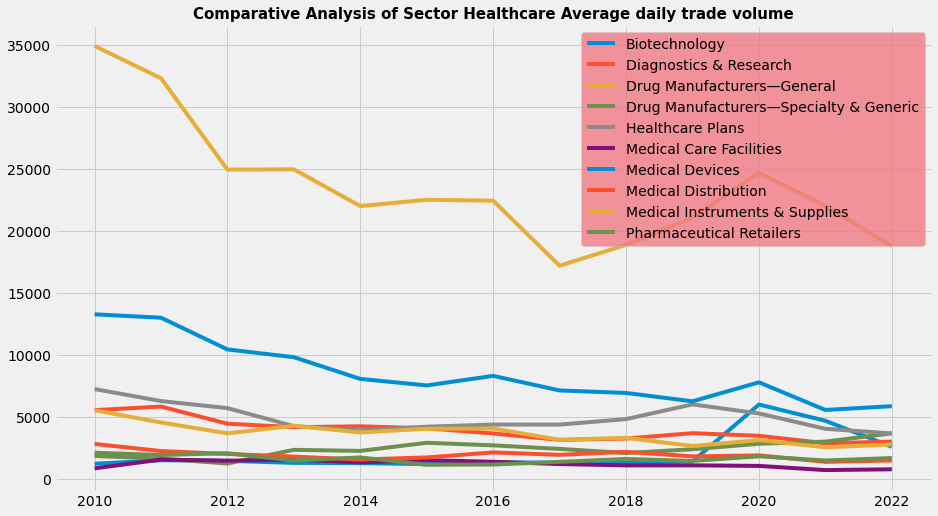

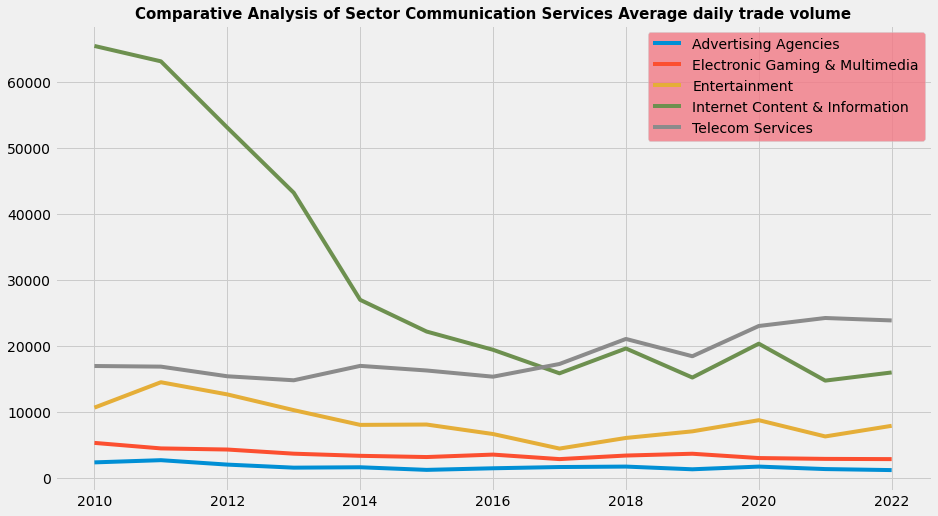

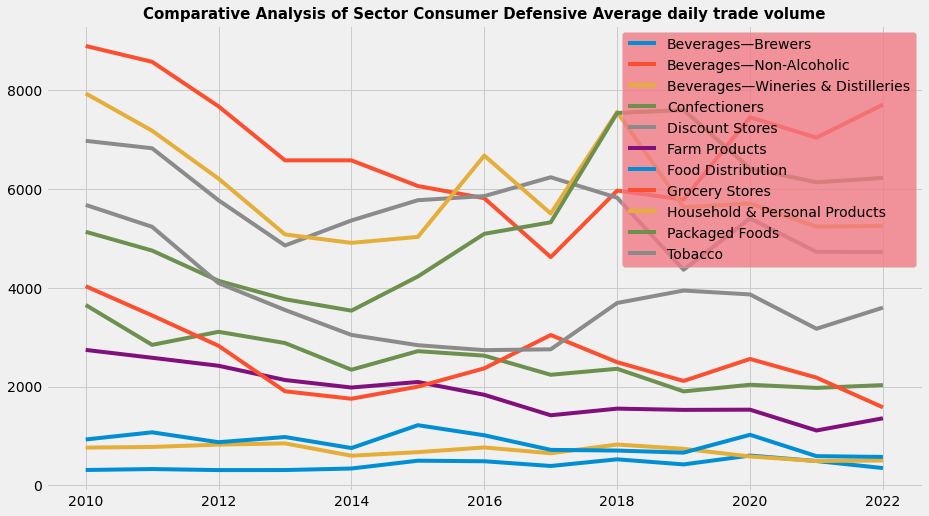

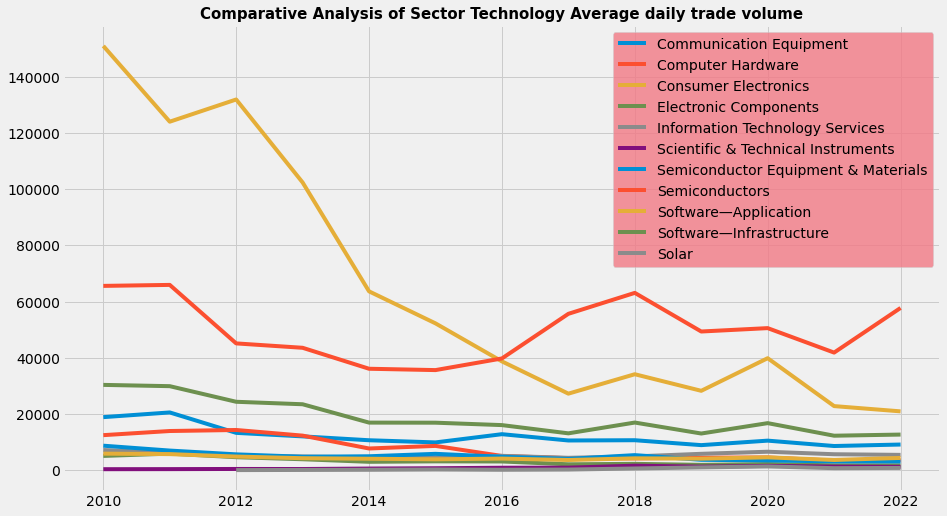

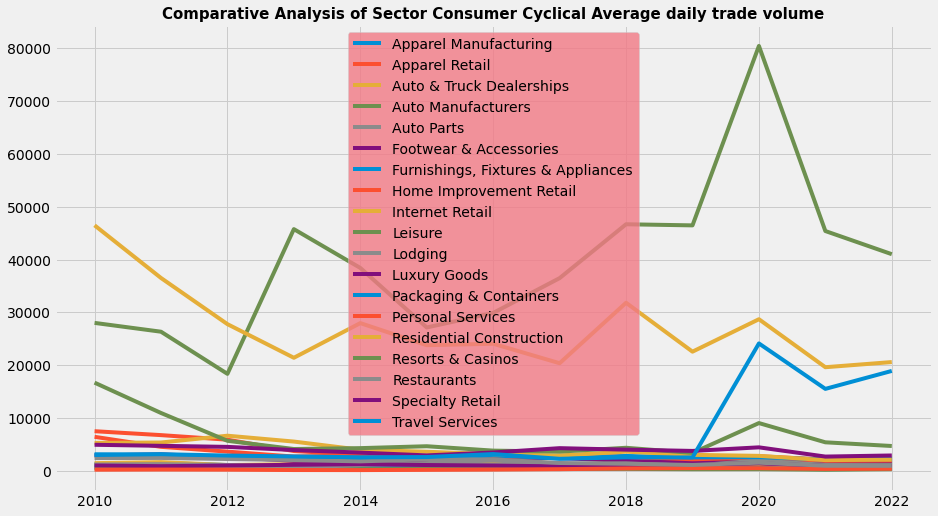

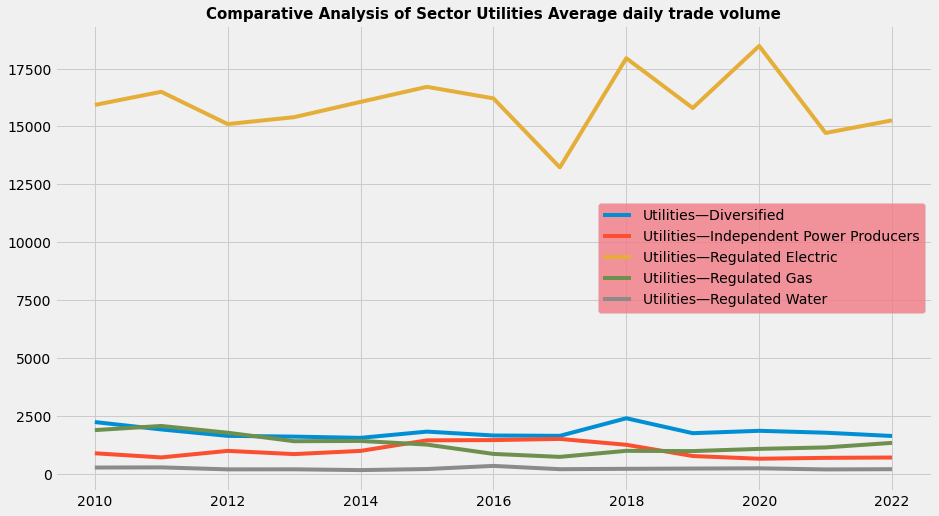

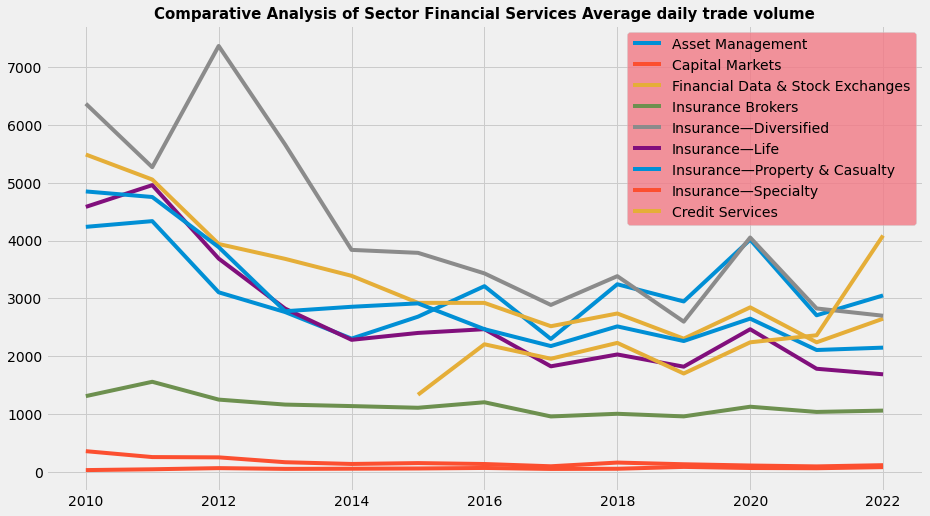

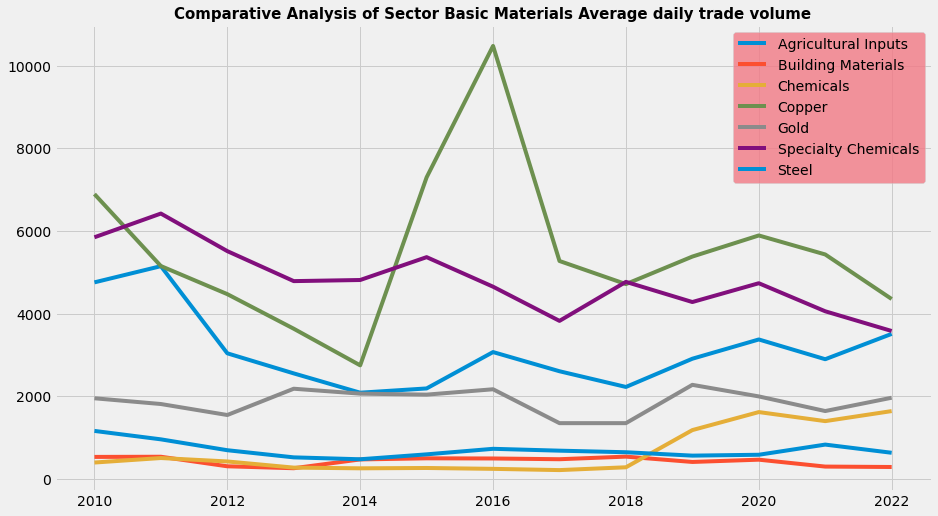

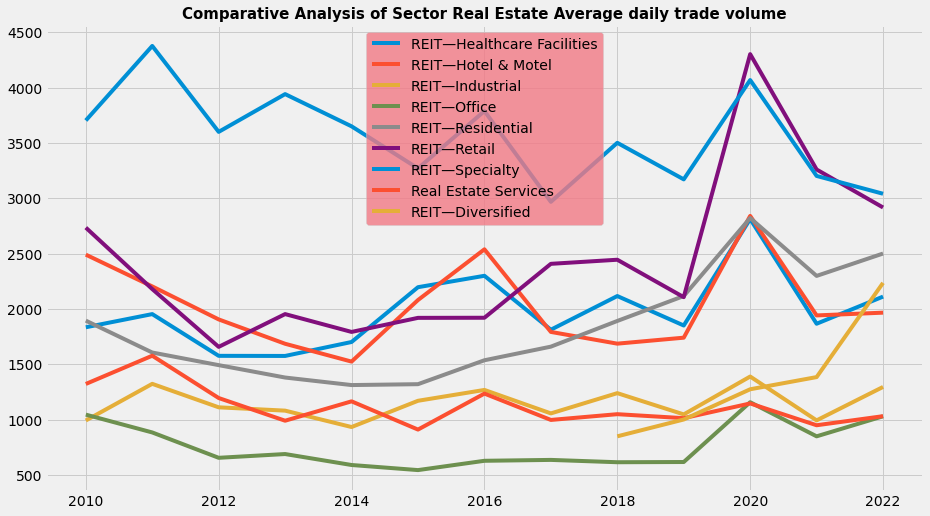

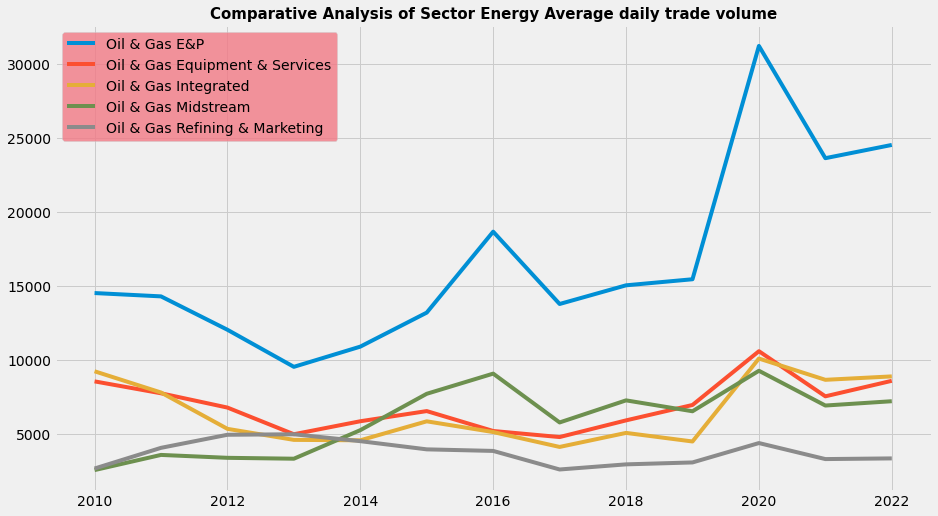

In [30]:
stcks_meta_data=pd.merge(sp_500_stocks,sp_500_comp, how='left', on=['Symbol'])
color={'Electronic Gaming & Multimedia':'#f2f23f','Internet Content & Information':'#92f005','Telecom Services':'#f55c0a','Entertainment':'#0af5ba','Advertising Agencies':'#0a93f5'}
for sec in stcks_meta_data[~stcks_meta_data['Sector'].isnull()]['Sector'].unique():
    fig1, ax1=plt.subplots(figsize=(14,8))
    indus_data=stcks_meta_data[stcks_meta_data['Sector']==sec].groupby(['year', 'Industry'])['Volume'].sum().apply(lambda x:x/1000000).reset_index().round()
    for indus in indus_data['Industry'].unique():
        ax1.plot(indus_data[indus_data['Industry']==indus]['year'], indus_data[indus_data['Industry']==indus]['Volume'], label=indus)
        
    ax1.set_title(f"Comparative Analysis of Sector {sec} Average daily trade volume", weight='bold', fontsize=15)
    ax1.legend(facecolor='#f27985', fontsize="medium")
    plt.show()

In [31]:
stcks_meta_data[stcks_meta_data['Sector']=='Communication Services']['Industry'].unique()

array(['Electronic Gaming & Multimedia', 'Internet Content & Information',
       'Telecom Services', 'Entertainment', 'Advertising Agencies'],
      dtype=object)

#### **Growth in stocks over period of 5 years (Stocks considered are: Amazon, Facebook, Home Depot, Apple, Chipotle Mexican Grill, Dollar Tree, ULTA Beauty)**

In [32]:
sp_500_stocks[(sp_500_stocks['Symbol']=="AMZN") & (sp_500_stocks["year"]>year-5)].to_csv("/kaggle/working/AMZN_STCK.csv")

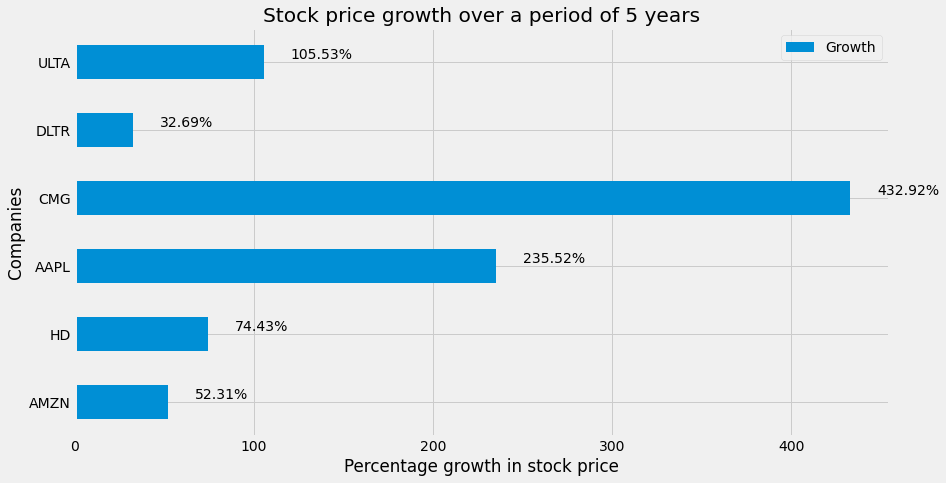

In [33]:
stcks_to_study={"Amazon.com, Inc.":"AMZN","Home Depot, Inc. (The)": "HD", "Apple Inc.":"AAPL","Chipotle Mexican Grill, Inc.":'CMG',"Dollar Tree, Inc.":"DLTR","Ulta Beauty, Inc.":"ULTA"}
sp_stcks_5yrs=sp_500_stocks[sp_500_stocks['year']>year-5]
stcks_growth=[]
for keys in stcks_to_study:
    stock=sp_stcks_5yrs[sp_stcks_5yrs['Symbol']==stcks_to_study[keys]]
    start_close=stock[stock['Date']==stock['Date'].min()]['Close'].values.item()
    end_close=stock[stock['Date']==stock['Date'].max()]['Close'].values.item()
    growth=round((end_close-start_close)/start_close*100,2)
    stcks_growth.append({'Symbol':stcks_to_study[keys],
                         'Growth':growth})
df=pd.DataFrame(stcks_growth)
ax=df.plot.barh(x="Symbol", figsize=(13,7))
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),2)}%', (p.get_width()+15, p.get_y() +0.3))
ax.set_xlabel('Percentage growth in stock price')
ax.set_ylabel('Companies')
ax.set_title("Stock price growth over a period of 5 years")
plt.show()
   